In [35]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import seaborn as sns
import matplotlib.pyplot as pl

In [25]:
movies=pd.read_csv('movies.dat',sep='::',
                  header=None,
                  engine='python',
                  encoding='latin-1'
                  )
users=pd.read_csv('users.dat',sep='::',
                  header=None,
                  engine='python',
                  encoding='latin-1'
                  )
ratings=pd.read_csv('ratings.dat',sep='::',
                  header=None,
                  engine='python',
                  encoding='latin-1'
                  )

In [19]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [26]:
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [27]:
movies.shape,users.shape,movies.shape

((3883, 3), (6040, 5), (3883, 3))

In [39]:
ratings.groupby(1)[2].count().sort_values(ascending=False).head(10)

1
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: 2, dtype: int64

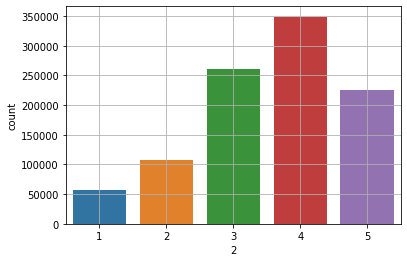

In [45]:
sns.countplot(ratings[2])
pl.grid()

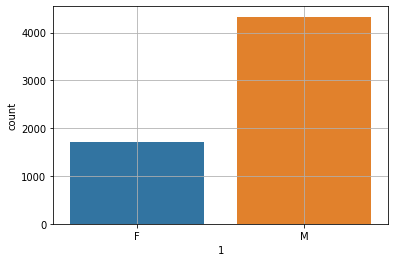

In [46]:
sns.countplot(users[1])
pl.grid()

In [58]:
training_set=pd.read_csv('u1.base',delimiter='\t',)
training_set=np.array(training_set,dtype='int')
test_set=pd.read_csv('u1.test',delimiter='\t',)
test_set=np.array(test_set,dtype='int')

In [55]:
training_set

array([[        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119],
       ...,
       [      943,      1188,         3, 888640250],
       [      943,      1228,         3, 888640275],
       [      943,      1330,         3, 888692465]])

In [60]:
test_set

array([[        1,        10,         3, 875693118],
       [        1,        12,         5, 878542960],
       [        1,        14,         5, 874965706],
       ...,
       [      459,       934,         3, 879563639],
       [      460,        10,         3, 882912371],
       [      462,       682,         5, 886365231]])

In [63]:
nb_users=max(max(training_set[:,0]),max(test_set[:,0])).astype(int)
nb_users

943

In [66]:
nb_movies=max(max(training_set[:,1]),max(test_set[:,1])).astype(int)
nb_movies

1682